In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv(r"C:\Users\TOSHIBA\Dak_gomycode\titanic-passengers.csv", sep=';')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
# Créez une nouvelle colonne pour le titre de civilité
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Créez une nouvelle colonne pour le nom de famille
df['Last_Name'] = df['Name'].str.split(',', expand=True)[0]


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Last_Name
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr,Collander
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr,Moen
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr,Jensen
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs,Palsson
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,Davidson


In [6]:
import pandas as pd
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df['Survived'] = le.fit_transform(df['Survived'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Title'] = le.fit_transform(df['Title'])
df['Last_Name'] = le.fit_transform(df['Last_Name'])

In [10]:
valid_columns = df.select_dtypes(include=['float', 'int']).columns
df[valid_columns] = df[valid_columns].fillna(df[valid_columns].mean())

In [15]:
X = df.drop('Survived', axis=1)
y = df['Embarked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.preprocessing import LabelEncoder

for feature in ['Sex', 'Embarked']:
    df[feature] = df[feature].astype('category')

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

score = dtc.score(X_test, y_test)
print("Accuracy: ", score)


Accuracy:  0.746268656716418


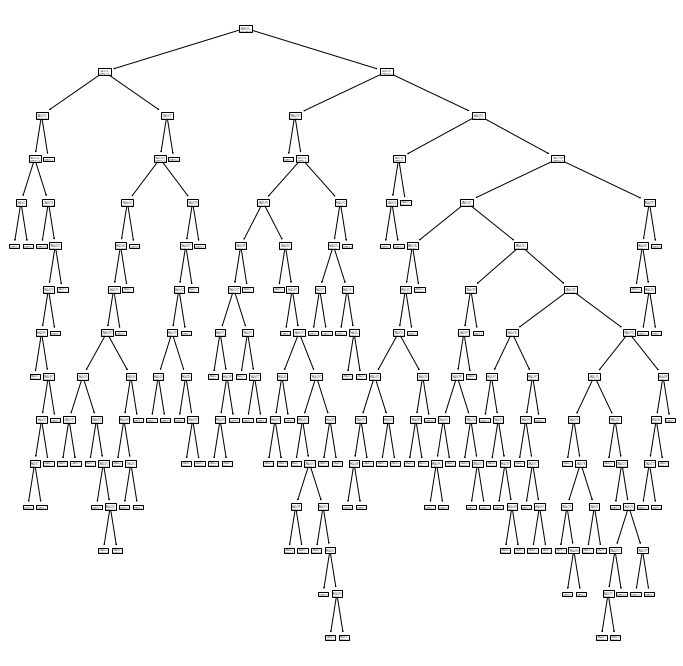

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(dtc, ax=ax)
plt.show()


In [20]:
y_pred=dtc.predict(X_test)

In [21]:
accuracy=accuracy_score(y_test, y_pred)

In [23]:
print("La précision de l'arbre de décision avec les paramètres modifiés est : {:.2f}%".format(accuracy * 100))

La précision de l'arbre de décision avec les paramètres modifiés est : 14.18%


In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)


RandomForestClassifier()

In [29]:
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("La précision de la forêt aléatoire avec 100 estimateurs est : {:.2f}%".format(accuracy * 100))


La précision de la forêt aléatoire avec 100 estimateurs est : 100.00%


In [27]:
rfc = RandomForestClassifier(n_estimators=200)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train, y_train)

accuracy = accuracy_score(y_test, y_pred)

print("La précision de la forêt aléatoire avec 200 estimateurs est : {:.2f}%".format(accuracy * 100))


La précision de la forêt aléatoire avec 200 estimateurs est : 100.00%
